# Project 1

Throughout this project we will look at linear systems the is ill posed. This means we have either zero or infinitely many solutions. We will look at some ways to approch such problems.

## Task 1

1. a)\
(1) An example of a linear system $A\textbf{x}=\textbf{y}$ with no solution can be $A=\begin{bmatrix}
1 & 0 & 1\\
2 & 0 & 2
\end{bmatrix}$ and $\textbf{y}=\begin{pmatrix}
2\\
2
\end{pmatrix}$. The two equations we obtain will represent two parallell planes which never will intersect.

    (2) An example of a linear system with infinatly many solutions can be $A=\begin{bmatrix}
1 & 0 & 1\\
-1 & 0 & 1
\end{bmatrix}$ and $\textbf{y}=\begin{pmatrix}
2\\
2
\end{pmatrix}$. Here the planes obtained will intersect for $x_1=0$ and $x_3=2$, but we get a infinite set of solutions for $x_2$.\
\
b)\
    To show that $A^TA$ and $AA^T$ is symmetric we look at what happens if we transpose them. $(AA^T)^T=(A^T)^TA^T=AA^T$ and $(A^TA)^T=A^T(A^T)^T=A^TA$ which shows that they are symmetric. To show that they are positive semi definite we need to show that $\textbf{x}^TA^TA\textbf{x}\geq 0$ and $\textbf{x}^TAA^T\textbf{x}\geq 0$. We use the definition of the norm for real numbers and obtain $\textbf{x}^TA^TA\textbf{x}=(A\textbf{x})^TA\textbf{x}=||A\textbf{x}||^2\geq 0$ ad $\textbf{x}^TAA^T\textbf{x}=(A^T\textbf{x})^TA^T\textbf{x}=||A^T\textbf{x}||^2\geq 0$.\
    \
    From the propery $rank(A)=rank(A^TA)=rank(AA^T)$ for real matrices we can we can conclude that $A^TA \in \mathbb{R}^{nxn}$ is not invertible since $rank(A^TA)<n$. However $AA^T \in \mathbb{R}^{mxm}$ will have $rank(AA^T)=m$ and will be invertible.\
\
c)\
    Given the lagrange equation $$\mathcal{L}(\textbf{x},\mathbf{\lambda})=\textbf{x}^T\textbf{x}+\mathbf{\lambda}^T(A\textbf{x}-\textbf{y})$$.\
    We want to minimize this equation for $\textbf{x}$ and $\lambda$. We then calculate$\nabla_x\mathcal{L}(\textbf{x},\mathbf{\lambda})$ and $\nabla_\lambda \mathcal{L}(\textbf{x},\mathbf{\lambda})$.\
    (1) $\nabla_x\mathcal{L}(\textbf{x},\mathbf{\lambda})=2\textbf{x} + A^T\mathbf{\lambda}$ and (2) $\nabla_\lambda \mathcal{L}(\textbf{x},\mathbf{\lambda})=A\textbf{x}-\textbf{y}$. By setting both equal to $0$ we obtain $\textbf{x}=-\frac{A^T\mathbf{\lambda}}{2}$. Putting this into equation (2) we obtain $\mathbf{\lambda}=-2(AA^T)^{-1}\textbf{y}$. Inserting this back into (1) and solve for $\textbf{x}$ we get $$\textbf{x}_{min}=A^T(AA^T)^{-1}\textbf{y}$$

1. d)\
    From c) we have $\textbf{x}_{min}=A^T(AA^T)^{-1}\textbf{y}$. If we substitute $A^T$ with $QR$ we obtain $\textbf{x}_{min}=QR(R^TQ^TQR)^{-1}\textbf{y}$. Since Q is orthogonal $Q^TQ=I$ and we have $$\textbf{x}_{min}=QR(R^TR)^{-1}\textbf{y}=QRR^{-1}(R^T)^{-1}\textbf{y}=QR^{-T}\textbf{y}$$\
    \
    Now we can implement a function that calculates $Q$ and $R$ and solve for $\textbf{x}_{min}$. We start by generating a random $mxn$ matrix $A$ and multiple random solutions $x$ which we will use this throughout the project. We obtain $\textbf{y}$ from $A\textbf{x}$ and can now compare our solution for $A\textbf{x}=\textbf{y}$ with the actual solution $\textbf{x}_{true}$ which is the ones randomly generated.
    

In [276]:
import numpy as np
from scipy.linalg import norm
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt

In [277]:
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

m = 2048
n = 8096
A = generate_A(m,n)

N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))  #This will be our x_true that will be compared to our solution

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)


(8096, 100)
(2048, 100)


In [278]:
def modified_Gram_Schmidt(A):
    m,n=A.shape   #getting the dimensions of A
    Q , R = np.zeros((m,n)), np.zeros((m,m))  #creating empty matrices
    
    u=A.copy()
    
    for i in range(m):   
        R[i,i]=norm(u[i])
        Q[i]=u[i]/R[i,i]   #By getting the row vectors in A you won't need to transpose A and can avoid slicing for better runtime
        for k in range(i+1,m):
            R[i,k]=Q[i]@u[k]
            u[k]=u[k]-R[i,k]*Q[i]
            

        
        
    
    return Q.T,R  #Transposing Q to get QR=A^T

1.\
e)\
    Now that we have shown that $\textbf{x}_{min}=QR^{-T}\textbf{y}$ we want to solve this equation to find $\textbf{x}_{min}$, without having to invert $R^T$. By setting $R^{-T}\textbf{y}=\textbf{z}$ we can first solve the system $R^T\textbf{z}=\textbf{y}$ and then calculate $\textbf{x}_{min}=Q\textbf{z}$.

In [279]:
def solve_x_min(Q,R,y):
    
    z=sp.linalg.solve_triangular(R.T,y, lower=True) #R^T will be lower triangular and solvable for z
    
    x_min=Q@z 
    
    
    return x_min


In [280]:
AAT = A @ A.T  #generating AA^T and QR since they will not be declared outside time scope
Q,R=modified_Gram_Schmidt(A)

We can now use the implemented functions to find $\textbf{x}_{min}$ for $N$ different $y$ and compare runtime and accuracy with the library function np.linalg.solve().

In [281]:
%%timeit -r 1 -n 1
AAT = A @ A.T


284 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [282]:
%%timeit -r 1 -n 1
x_min_ls=np.zeros((A.shape[1],N)) 


for i in range(N):
    z = np.linalg.solve(AAT,Y[:,i])
    x_min_ls[:,i] = A.T @ z

print(norm(x_min_ls[:,1]-X[:,1]))

77.14688183477827
8.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [283]:
%%timeit -r 1 -n 1

Q,R=modified_Gram_Schmidt(A)


30.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [284]:
%%timeit -r 1 -n 1

x_min=np.zeros((A.shape[1],N))
for i in range(N):
    x_min[:,i]=solve_x_min(Q,R,Y[:,i])
print(norm(x_min[:,1]-X[:,1]))

77.14688183477827
877 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [285]:
print(norm(X[:,1])) #the norm if we take a guess at x_true

89.37244853756665


1.\
f)\
As we can see and would expect the library function is faster than our implemented function if you include the decomposition though it is not by that much. The computation with QR decomposition however is much faster than the library function which tells us that if we were to solve for a bigger set of vectors we could save a lot of time by doing QR decomposition before we solve for $\textbf{x}$.\
\
The norm we obtained from $||\textbf{x}_{min}-\textbf{x}_{true}||$ where $\textbf{x}_{min}$ is an arbitrary solution is the same for both which implies that our function works well. Considering the size of $\textbf{x}\in\mathbb{R}^n$ where $n=8096$ and the values of $\textbf{x}$ is normally distributed around $0$ with standard deviation $=1$, the norm tells us that our solution is not very close to $\textbf{x}_{true}$. Although we do need to keep in mind that there are infinitely many solutions. This means  it is not certain that it is $\textbf{x}_{true}$ that will minimize the Lagrange equation. When our conditions is set to be the gradients of Lagrange equal to zero we will get the unique solution that minimizes the norm and therfore we expect it to differ from $\textbf{x}_{true}$.\
\
If we would take a guess at what $\textbf{x}_{true}$ is, the most logical guess would be just the zero vector since $\textbf{x}_{true}$ is normally distributed around zero. If we calculate $||\textbf{x}_{min}-\textbf{x}_{true}||$ with $\textbf{x}_{min}=\mathbf{0}$ we get a norm larger than what we got from our computed $\textbf{x}_{min}$. This implies that we get a somewhat better result from our calculation than the most "probable" solution.


 

## Task 2
2.\
    a)\
    Given the equation $$T(\textbf{x})=||A\textbf{x}-\textbf{y}||^2+\mu||\textbf{x}||^2$$ we want to find $\nabla_xT(X)=0$.
    This was done in assignment two where we obtained $$\nabla_xT(X)=\nabla_x(||A\textbf{x}-\textbf{y}||^2+\mu||\textbf{x}||^2)=2A^T(A\textbf{x}-\textbf{y})+2\mu\textbf{x}$$
    If we set this equal to zero we get the minimized solution $\textbf{x}_r$ and by rearranging we get $$(A^TA+\mu I)\textbf{x}_r=A^T\textbf{y}$$\
    We have already shown that $A^TA$ is symmetric and positive semi definite. Since $\mu$ is strictly greater than zero we also get that $\textbf{x}^T(A^TA+\mu I)\textbf{x}=\textbf{x}^T(A^TA)\textbf{x}+\textbf{x}^T\mu I\textbf{x}$ where $\textbf{x}^T(A^TA)\textbf{x}\geq 0$ and $\textbf{x}^T\mu I\textbf{x}>0$. Therefore $A^TA+\mu I$ is an SPD.

b)\
Given the decomposition $$A=U\Sigma V^T$$ we want to show that $$\textbf{x}_r=VDU^T\textbf{y}$$ where $D$ is a diagonal matrix depending on the singular values $\Sigma$ and the parameter $\mu$. We use the equation found in a and substitute for $A$.\
\
$$(V\Sigma^TU^TU\Sigma V^T+\mu I)\textbf{x}_r=V\Sigma U^T\textbf{y}$$
$U$ and $V$ are unitary matrices $\implies U^TU=I$
$$(V\Sigma^T\Sigma V^T+ \mu I)\textbf{x}_r=V\Sigma^TU^T\textbf{y}$$
$$(V\Sigma^T\Sigma V^T+ V\mu IV^T)\textbf{x}_r=V\Sigma^TU^T\textbf{y}$$
$$D_1=\Sigma^T\Sigma+\mu I$$
$$VD_1V^T\textbf{x}_r=V\Sigma^TU^T\textbf{y}$$
$$D=D_1^{-1}\Sigma^T$$
$$\textbf{x}_r=VDU^T\textbf{y}$$
The inverse of $D_1$ is easy to find since $D_1$ is a diagonal matrix.


In [286]:
#2 c)
def Tikhonov_solveSVD(U,S,Vt,mu,y):
    D=S/(S**2+mu)    #the inverse of D1 is just 1/D1
    xr=Vt.T*D@U.T@y
    return xr

In [299]:

U,S,Vt = np.linalg.svd(A,full_matrices = False)
print(U.shape) # Expect (m,m)
print(S.shape) # Expect (m)
print(Vt.shape) # Expect (m,n) A lot less redundant vectors!

mu=np.logspace(5,-6,num = 100)  #Creating 100 different values of mu from 10^5 down to 10^-6
mu_ls=np.logspace(5,-6,num = 10) #creating 10 different values of mu from 10^5 down to 10^-6 for linalg solve
X2d = np.random.normal(0.0,1.0,(A.shape[1])) #generating a new x just to clarify that we use the same x for different values of mu
Y2d = A@X2d

norm_list=np.zeros(100) #list for the norms from linalg.solve()
x_ls=np.zeros(10)       #list for the norms from Tikhonov


(2048, 2048)
(2048,)
(2048, 8096)


In [300]:
%%timeit -r 1 -n 1
U,S,Vt = np.linalg.svd(A,full_matrices = False)
for i in range(100):
    xr=Tikhonov_solveSVD(U,S,Vt,mu[i],Y2d)
    norm_list[i]=norm(xr-X2d)  #list of norms from Tikhonov

1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [301]:
%%timeit -r 1 -n 1
b=A.T@Y2d
for i in range(10):
    A_ls=A.T@A+mu_ls[i]*np.identity(n) #note: ls notation is for linalg.solve, not least squares.
    
    x=np.linalg.solve(A_ls,b)
    x_ls[i]=norm(x-X2d)     #list of norms from linalg.solve

43.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


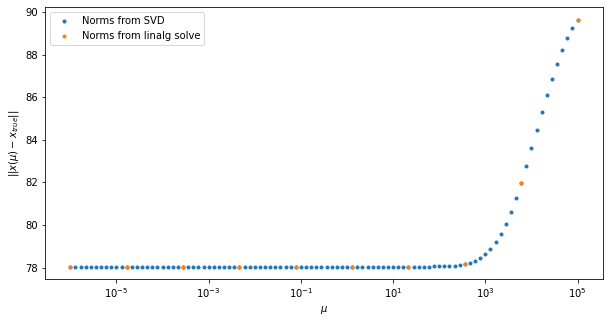

In [307]:

plt.figure(figsize=(10,5))
plt.plot(mu,norm_list,'.', label="Norms from SVD")
plt.plot(mu_ls,x_ls,'.', label="Norms from linalg solve")
plt.semilogx()
plt.legend(loc="upper left")
plt.xlabel("$\mu$")
plt.ylabel("$||x(\mu)-x_{true}||$")

plt.show()

2.\
d)\
We can clearly see by the computational time that the SVD solver we wrote i significantly faster than the np.linalg.solve(). The best reconstruction of $\textbf{x}_{true}$ is for low values of $\mu$. This is quite logical since we are working with a $\textbf{y}$ directly costructed from $\textbf{x}_{true}$.

## Task 3
a)\
We want to show that $B=I-WW^T$ is a projection matrix that is $B=B^2$. 
$$B^2=(I-WW^T)(I-WW^T)=I^2-2WW^T+WW^TWW^T$$
Since $W$ is pairwise orthogonal we have that $W^TW=I$
$$I^2-2WW^T+WW^TWW^T=I-2WW^T+WW^T=I-WW^T$$
We now have shown that $B$ is a projection matrix. We can also show that $B$ only has two non negative eigenvalues and therefore is positive semi definite.
$$B\textbf{x}=\lambda\textbf{x}=B^2\textbf{x}=\lambda^2\textbf{x}\implies \lambda^2=\lambda$$
The only solutions for $\lambda$ is $\lambda=0$ and $\lambda=1\implies B$ is positive semi definite.

b)\
(1)\
$$\mathcal{L}(\textbf{x},\mathbf{\lambda})=\frac{1}{2}\textbf{x}^TB\textbf{x}+\mathbf{\lambda}^T(A\textbf{x}-\textbf{y})$$
If we minimize this the same way as in task 2 by setting the gradient equal to zero we get as shown in assignment 2
$$\nabla_x\mathcal{L}(\textbf{x},\mathbf{\lambda})=\frac{1}{2}(B+B^T)\textbf{x}+A^T\mathbf{\lambda}=0$$
$$\nabla_{\lambda}\mathcal{L}(\textbf{x},\mathbf{\lambda})=A\textbf{x}-\textbf{y}=0$$
This will result in the linear system
$$\begin{bmatrix}
\frac{1}{2}(B+B^T) & A^T \\
A & 0
\end{bmatrix}=\begin{bmatrix} \textbf{x} \\ \mathbf{\lambda} \end{bmatrix}=\begin{bmatrix} 0 \\ \textbf{y} \end{bmatrix}$$
We have that 
$$B=\begin{bmatrix}
B_0 & 0 \\
0 & B_1
\end{bmatrix}, A=\begin{bmatrix} I & I \end{bmatrix}$$
Since $B$ is symmetric $\frac{1}{2}(B+B^T)=B$
$$\implies\begin{bmatrix} \frac{1}{2}(B+B^T) & A^T \\A & 0\end{bmatrix}=\begin{bmatrix} B_0 & 0&I \\
0 & B_1 & I\\
I & I & 0
\end{bmatrix}=\begin{bmatrix} I-W_0W_0^T & 0&I \\
0 & I-W_1W_1^T & I\\
I & I & 0 \end{bmatrix}$$
With $\textbf{y}=\textbf{u}+\textbf{v}$ we get
$$\begin{bmatrix} I-W_0W_0^T & 0&I \\
0 & I-W_1W_1^T & I\\
I & I & 0 \end{bmatrix}\begin{bmatrix} \textbf{u} \\ \textbf{v} \\ \mathbf{\lambda} \end{bmatrix}=\begin{bmatrix} 0 \\ 0 \\ \textbf{y} \end{bmatrix}$$

(2)\
We now want to eliminate $\lambda$ such that we can solve for $\textbf{u}$ and $\textbf{v}$ with the set of basis vectors $W_0$ and $W_1$ and a given $\textbf{y}$.\
From (1) we have the the set of linear equations
$$(I-W_0W_0^T)\textbf{u}+\lambda I=0$$
$$(I-W_1W_1^T)\textbf{v}+\lambda I=0$$
$$\implies (I-W_0W_0^T)\textbf{u}+\lambda I=(I-W_1W_1^T)\textbf{v}+\lambda I$$
$$\textbf{u}-(W_0W_0^T)\textbf{u}=\textbf{v}-(W_1W_1^T)\textbf{v}$$
Use that $\textbf{v}=\textbf{y}-\textbf{u}$ and we get
$$\textbf{u}-(W_0W_0^T)\textbf{u}=\textbf{y}-\textbf{u}-(W_1W_1^T)\textbf{y}+(W_1W_1^T)\textbf{u}$$
\
Rearrange this and obtain\
$$(W_0W_0^T+W_1W_1^T-2I)\textbf{u}=(W_1W_1^T-I)\textbf{y}$$
\
We now make a new linear sytem solvable without $\lambda$\
$$\begin{bmatrix} W_0W_0^T+W_1W_1^T-2I & 0 \\0 & I\end{bmatrix}\textbf{u}=\begin{bmatrix} W_1W_1^T\textbf{y}-\textbf{y}\\ \textbf{y}-\textbf{v}\end{bmatrix}$$
\
Now we can easily implement a funcion that solves for $\textbf{u}$ and $\textbf{v}$ given the set of basis vectors $W_0$ and $W_1$ and the vector $\textbf{y}$. We just need to solve the first linear equation for $\textbf{u}$ and then subtract $\textbf{u}$ from $\textbf{y}$ to find $\textbf{v}$.

In [291]:
#3b) (3)

def uv_solver(y,W0,W1):
    C=W0@W0.T+W1@W1.T-2*np.identity(len(W0@W0.T)) #making the LHS matrix
    d=W1@W1.T@y-y                                #making RHS vector
    u=np.linalg.solve(C,d)     #solving for u
    v=y-u                      #solving for v
    return u,v

(784, 100)


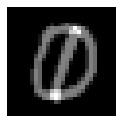

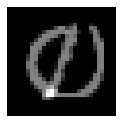

In [292]:
Mixes = np.load('Data/mixed.npy')
print(Mixes.shape) # Should be (784,100)

plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

plt.imshow(Mixes[:,32].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

(784, 16)
(784, 16)


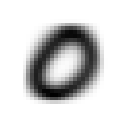

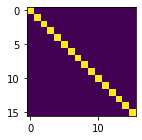

In [293]:
W0 = np.load('Data/W0.npy')  #basis for W0
W1 = np.load('Data/W1.npy')  #basis for W1
print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)

plt.imshow(W0[:,0].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

W0TW0 = np.dot(W0.T, W0)
plt.imshow(W0TW0)
plt.show()

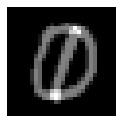

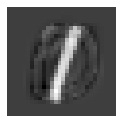

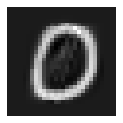

In [294]:
#3d) Testing the solver for some arbitrary vector y from the mixed set wrt the basises W0 and W1

u,v=uv_solver(Mixes[:,1],W0,W1)
plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()
plt.imshow(v.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()
plt.imshow(u.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

We can se from the images that we have managed to seperate the zero and one from the mixed image and that the reconstructions are easily recognizable in comparison to the basis. What we have essentially done is projecting the mixed vector $\textbf{y}$ onto the basis $W$ where $\textbf{u}$ and $\textbf{v}$ is the projection onto the basis for the zero image ($W_0$) and one image ($W_1$) respectively.\
\
The advantage of this method is that we get the solution with the minimized norm with respect to the basis. A disadvantage of this could be if the solution isn't the solution with minimized norm. For example like it was in task 1 where the true solution was not the solution that minimized the norm.\
\
This method for single channel source separation works fairly well. One drawback by solving for one basis first and then subtracting from the single source to retrieve the other image is that this is not necessarely the best way. This is faster, but it could be more percise to find both images with respect to their own basis seperately.\
\
Throughout this project we have seen that for ill poste linear systems with infinitely many solutions it is not given that minimizing the norm is the best way of solving such systems. Although it seems to be a good approach if you know there exist a solution.